<a href="https://colab.research.google.com/github/Laureoby/apple_quality_dataset/blob/main/apple_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/drive/MyDrive/apple_quality.csv')
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
#We drop Nan values in dataset
data.dropna(inplace=True)
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [9]:
#We also delete Id column
data.drop('A_id',axis=1,inplace=True)
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


**Data visualization and user stories**

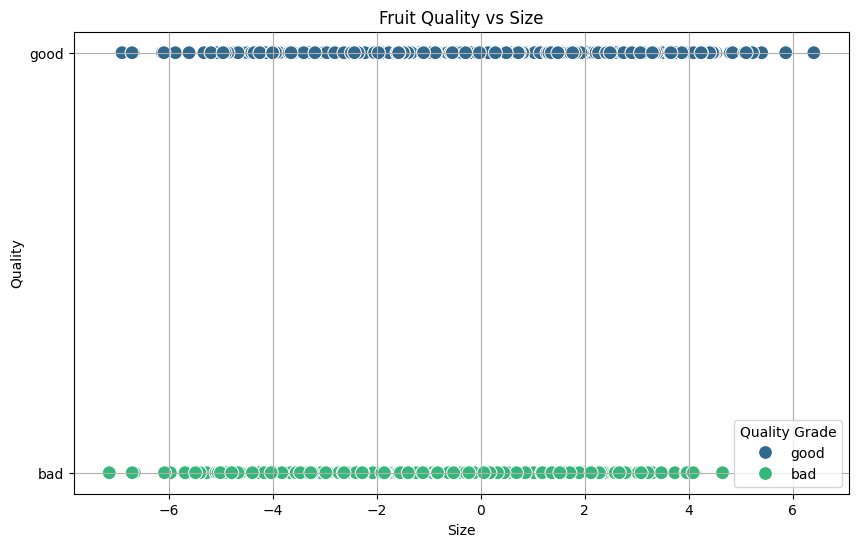

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Size', y='Quality', hue='Quality', palette='viridis', s=100)

plt.title('Fruit Quality vs Size')
plt.xlabel('Size')
plt.ylabel('Quality')
plt.legend(title='Quality Grade')
plt.grid(True)
plt.show()

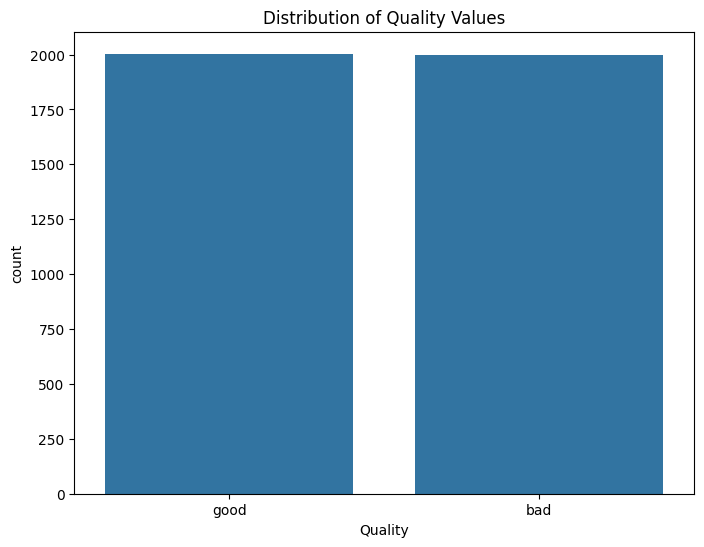

percentage of good quality apples 0.501
percentage of bad quality apple is 0.501


In [11]:
#we print histogram of target value
plt.figure(figsize=(8,6))
sns.countplot(x=data['Quality'])
plt.title('Distribution of Quality Values')
plt.show()

good=data['Quality'].value_counts()[0]/len(data['Quality'])
bad=data['Quality'].value_counts()[0]/len(data['Quality'])
print(f'percentage of good quality apples {good}')
print(f'percentage of bad quality apple is {bad}')

In [12]:
data['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

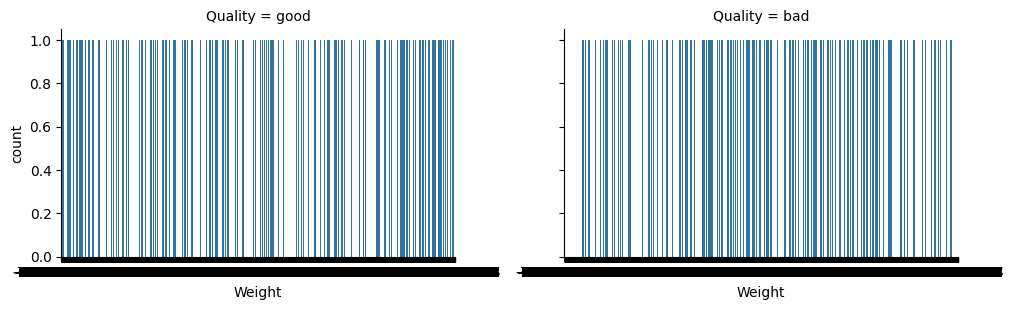

In [13]:
#Weight history
grid = sns.FacetGrid(data, col='Quality', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Weight', order=sorted(data['Weight'].unique()))
plt.show()

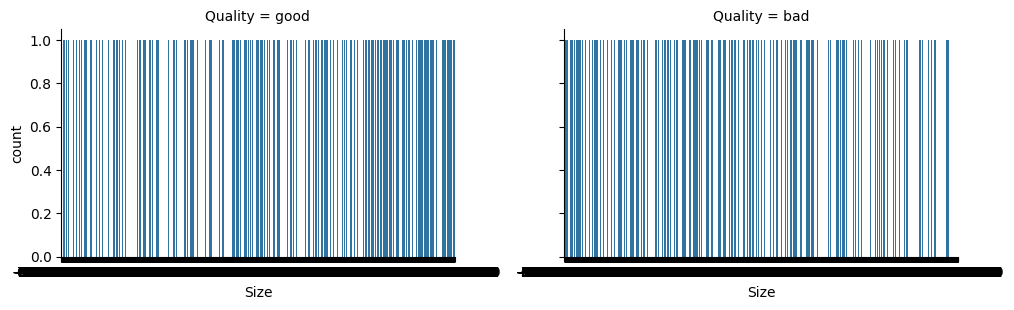

In [14]:
#Weight history
grid = sns.FacetGrid(data, col='Quality', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Size', order=sorted(data['Size'].unique()))
plt.show()

In [15]:
#We encode values in Quality column with 0 and 1
data['Quality'] = data['Quality'].apply(lambda x: 0 if x == 'bad' else 1)
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


from matplotlib import pyplot as plt
_df_0['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sweetness'].plot(kind='hist', bins=20, title='Sweetness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Crunchiness'].plot(kind='hist', bins=20, title='Crunchiness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Acidity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Size', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Weight', y='Sweetness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Sweetness', y='Crunchiness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Crunchiness', y='Juiciness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Size'].plot(kind='line', figsize=(8, 4), title='Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Sweetness'].plot(kind='line', figsize=(8, 4), title='Sweetness')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Crunchiness'].plot(kind='line', figsize=(8, 4), title='Crunchiness')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Acidity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Size', y='Acidity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Acidity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Weight', y='Acidity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Acidity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Sweetness', y='Acidity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Acidity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Crunchiness', y='Acidity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

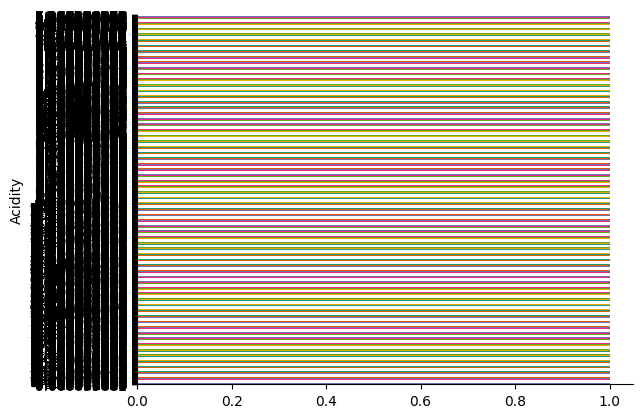

In [21]:
data.groupby('Acidity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

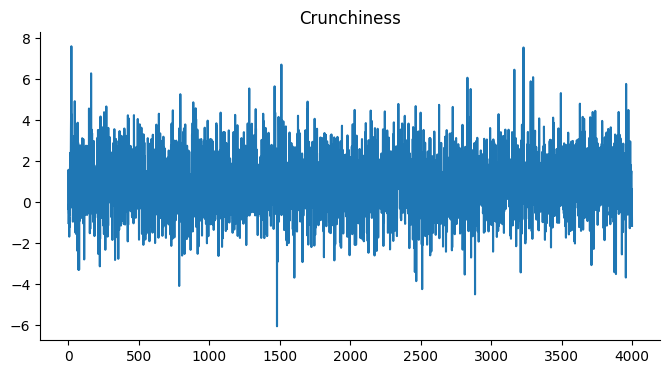

In [20]:
data['Crunchiness'].plot(kind='line', figsize=(8, 4), title='Crunchiness')
plt.gca().spines[['top', 'right']].set_visible(False)

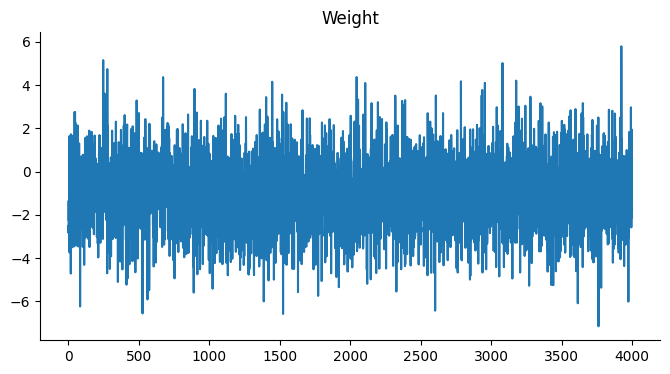

In [16]:
data['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

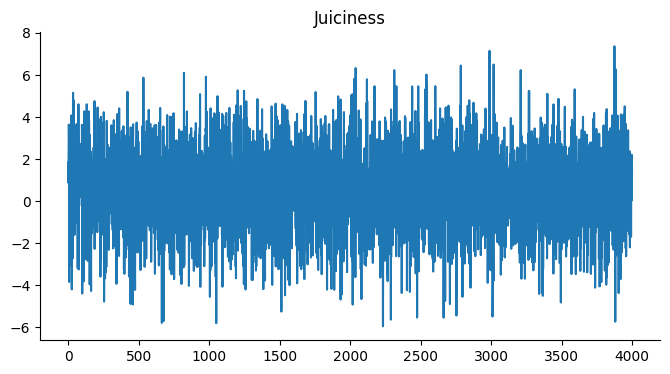

In [19]:
data['Juiciness'].plot(kind='line', figsize=(8, 4), title='Juiciness')
plt.gca().spines[['top', 'right']].set_visible(False)

As a Quality Assurance Analyst, I want to analyze the correlation between the physical attributes (Size, Weight) and the sensory attributes (Sweetness, Crunchiness, Juiciness, Acidity) of fruits to develop a quality grading scale that helps in categorizing the fruits into premium, standard, and economy grades based on their overall Quality scores.

Correlation matrix:
                 Size    Weight  Sweetness  Crunchiness  Juiciness   Acidity
Size         1.000000 -0.170702  -0.319504     0.167981  -0.024058  0.091929
Weight      -0.170702  1.000000  -0.134859    -0.095947  -0.094126  0.016387
Sweetness   -0.319504 -0.134859   1.000000    -0.017346   0.097540  0.098615
Crunchiness  0.167981 -0.095947  -0.017346     1.000000  -0.236538 -0.011259
Juiciness   -0.024058 -0.094126   0.097540    -0.236538   1.000000  0.237836
Acidity      0.091929  0.016387   0.098615    -0.011259   0.237836  1.000000


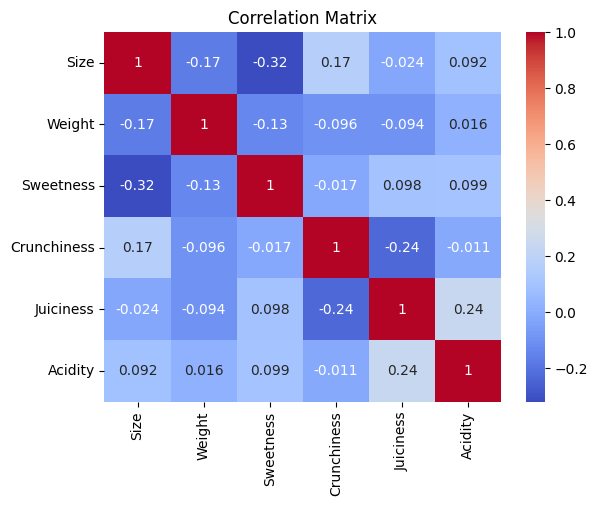

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

label_encoder = LabelEncoder()
data['Acidity'] = label_encoder.fit_transform(data['Acidity'])
data['Sweetness'] = label_encoder.fit_transform(data['Sweetness'])
data['Crunchiness'] = label_encoder.fit_transform(data['Crunchiness'])
data['Juiciness'] = label_encoder.fit_transform(data['Juiciness'])

# Correlation Analysis
correlation_matrix = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Acidity']].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Quality Grading
# Use clustering to form quality grades based on sensory and physical attributes
kmeans = KMeans(n_clusters=3, random_state=42)
data['Quality Grade'] = kmeans.fit_predict(data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Acidity']])

# Mapping cluster labels to quality grades
grade_mapping = {
    0: 'Economy',
    1: 'Premium',
    2: 'Standard'
}
data['Quality Grade'] = data['Quality Grade'].map(grade_mapping)

# Print the first few entries to see the categorized quality grades
data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Acidity', 'Quality Grade']].head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Size,Weight,Sweetness,Crunchiness,Juiciness,Acidity,Quality Grade
0,-3.970049,-2.512336,3992,304,3007,397,Standard
1,-1.195217,-2.839257,3919,2713,2235,550,Standard
2,-0.292024,-1.351282,999,657,3552,3543,Economy
3,-0.657196,-2.271627,3302,850,3810,2550,Economy
4,1.364217,-1.296612,2116,526,3638,2344,Economy


In [28]:
data['Quality Grade'].value_counts()

Quality Grade
Premium     1373
Economy     1326
Standard    1301
Name: count, dtype: int64

In [29]:
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Quality Grade
0,-3.970049,-2.512336,3992,304,3007,0.329840,397,1,Standard
1,-1.195217,-2.839257,3919,2713,2235,0.867530,550,1,Standard
2,-0.292024,-1.351282,999,657,3552,-0.038033,3543,0,Economy
3,-0.657196,-2.271627,3302,850,3810,-3.413761,2550,1,Economy
4,1.364217,-1.296612,2116,526,3638,-1.303849,2344,1,Economy
